In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/Train/Fruit',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/Train/Fruit',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 50 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [5]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
#model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 43808)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [6]:
training_data.class_indices

{'Bơ': 0,
 'Cam': 1,
 'Chuối': 2,
 'Mận': 3,
 'Mít': 4,
 'Nho': 5,
 'Ổi': 6,
 'Táo': 7,
 'Vải': 8,
 'Xoài': 9}

In [7]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=20)]
history=model.fit(training_data,
                  steps_per_epoch=len(training_data),
                  batch_size = 64,
                  epochs=50,
                  validation_data=validation_data,
                  validation_steps=len(validation_data),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/50
2/2 [==============================] - 9s 5s/step - loss: 13.3860 - accuracy: 0.1000 - val_loss: 9.9577 - val_accuracy: 0.1000
Epoch 2/50
2/2 [==============================] - 6s 3s/step - loss: 7.5476 - accuracy: 0.0800 - val_loss: 2.4609 - val_accuracy: 0.1400
Epoch 3/50
2/2 [==============================] - 6s 3s/step - loss: 2.4400 - accuracy: 0.2000 - val_loss: 2.0914 - val_accuracy: 0.2800
Epoch 4/50
2/2 [==============================] - 6s 4s/step - loss: 2.0022 - accuracy: 0.2600 - val_loss: 1.7416 - val_accuracy: 0.3600
Epoch 5/50
2/2 [==============================] - 5s 3s/step - loss: 1.8267 - accuracy: 0.3800 - val_loss: 1.5787 - val_accuracy: 0.4000
Epoch 6/50
2/2 [==============================] - 14s 6s/step - loss: 1.5260 - accuracy: 0.4200 - val_loss: 1.3868 - val_accuracy: 0.6200
Epoch 7/50
2/2 [==============================] - 6s 3s/step - loss: 1.3286 - accuracy: 0.6000 - val_loss: 1.4640 - val_accuracy: 0.4000
Epoch 8/50
2/2 [=======================

Sai số kiểm tra là:  0.0038772926200181246
Độ chính xác kiểm tra là:  1.0


<function matplotlib.pyplot.show>

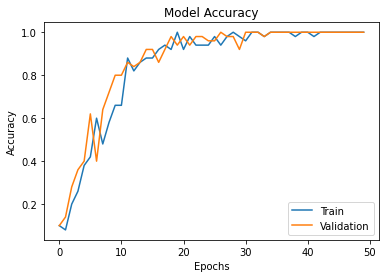

In [10]:
# Đánh giá chất lượng mô hình và đồ thị:
score = model.evaluate(validation_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show


In [11]:
model.save('fruit.h1')
model=load_model('fruit.h1')

INFO:tensorflow:Assets written to: fruit.h1/assets


Đây là trái Bơ


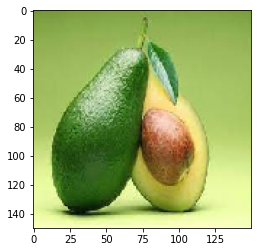

In [12]:
from tensorflow.keras.models import load_model
img=load_img("/content/drive/MyDrive/AI/Train/Fruit/Bơ/b1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Đây là trái Bơ'
if round(result[0][1])==1:
  prediction='Đây là trái Cam'
if round(result[0][2])==1:
  prediction='Đây là trái Chuối'
print(prediction)

Đây là trái Cam


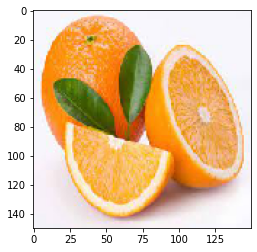

In [13]:
img=load_img("/content/drive/MyDrive/AI/Train/Fruit/Cam/c1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Đây là trái Bơ'
if round(result[0][1])==1:
  prediction='Đây là trái Cam'
if round(result[0][2])==1:
  prediction='Đây là trái Chuối'
print(prediction)

Đây là trái Chuối


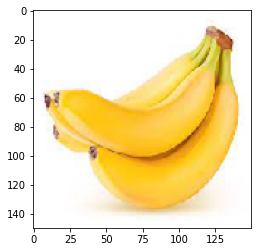

In [14]:
img=load_img("/content/drive/MyDrive/AI/Train/Fruit/Chuối/ch1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Đây là trái Bơ'
if round(result[0][1])==1:
  prediction='Đây là trái Cam'
if round(result[0][2])==1:
  prediction='Đây là trái Chuối'
print(prediction)